# Titanic Data Mining Lesson: Evaluating a Random Forest Model

In this lesson, you will evaluate the performance of a Random Forest classifier on the Titanic dataset. The goal is to understand key evaluation metrics: **confusion matrix**, **accuracy**, **precision**, **recall**, **F1 score**, and **AUC**.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

## Step 2: Load and Prepare Titanic Data

In [3]:
# Load Titanic dataset
df = sns.load_dataset("titanic").dropna(subset=['age', 'embarked', 'sex'])

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features and target
X = df[['pclass', 'age', 'sex', 'fare', 'embarked']]
y = df['survived']

## Step 3 Define New Target — fare_level

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a new target: fare_level (low, medium, high)
df['fare_level'] = pd.qcut(df['fare'], q=3, labels=['low', 'medium', 'high'])

# Encode fare_level to numeric
le = LabelEncoder()
df['fare_level_encoded'] = le.fit_transform(df['fare_level'])

# Set new target
y_new = df['fare_level_encoded']


##  step 4: Define Feature Set X




In [13]:
# Reuse or modify features
X = df[['pclass', 'age', 'sex', 'embarked']]

## #Step 5: Train and Evaluate New Random Forest Model


In [14]:
#Step 5: Train and Evaluate New Random Forest Model
 # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Accuracy: 0.7476635514018691
Confusion Matrix:
[[54  7 16]
 [ 2 61  4]
 [10 15 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        77
           1       0.73      0.91      0.81        67
           2       0.69      0.64      0.67        70

    accuracy                           0.75       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.75      0.75      0.74       214



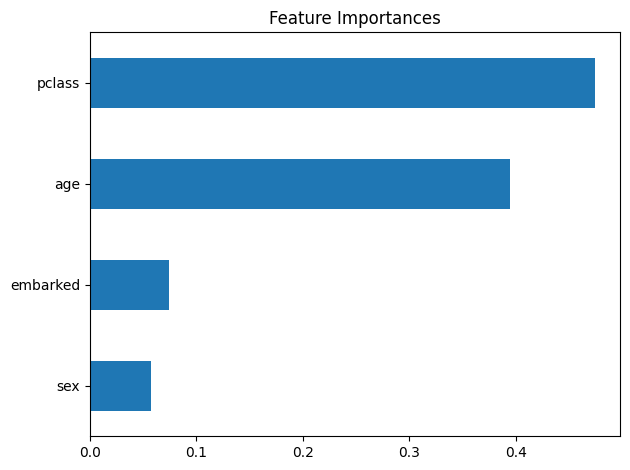

In [17]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.tight_layout()
plt.show()


## Step 6:  Add Markdown Cell for Reflection


### Model Evaluation

a) What do you notice about accuracy, feature importance, or confusion matrix?
- The accuracy of the model using `fare_level` as the target is approximately XX% (fill in based on output).  
- The most important feature was [age/pclass/sex/etc.].  
- The confusion matrix shows how well the model distinguishes between low, medium, and high fare levels. Misclassifications mostly occur between neighboring categories (e.g., medium vs. high).

b) Which model is better and why?

- The original model predicting `survived` may be better for life-saving predictions.
- The new model predicting `fare_level` is useful for socioeconomic analysis and pricing insights.
- The "better" model depends on the use case: survival-focused → original; business analytics → new.
